# Useful tools for python development

## Making notebooks interactive

ipywidgets provides an extremely simple interface for making interactive jupyter notebooks via the function ```interact```


In [4]:
import ipywidgets as widgets

At the most basic level, interact autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use interact, you need to define a function that you want to explore. Here is a function that triples its argument, x

In [15]:
def f(x):
    return 3*x

By specifying a range of values for x, we have generate a slider that goes between 0 and 10 with steps of 1

In [24]:
widgets.interact(f, x=(0, 10, 1))

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.f(x)>

interact can also be used to generate text input forms, drop down boxes, and checkboxes by passing strings, booleans, and lists respectively

In [21]:
interact(f, x = 'Hello')

interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [22]:
interact(f, x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [23]:
interact(f, x=[1,2,3])

interactive(children=(Dropdown(description='x', options=(1, 2, 3), value=1), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

interact can also be used as a decorator when a function is declared. Here is an example of a basic interactive plotting function.

In [17]:
%matplotlib inline

@widgets.interact(m=(-2.0,2.0), b = (-3, 3, 0.5))
def plot_line(m=1, b=1):
    fig = plt.figure()
    plt.clf()
    plt.grid()
    xs = np.linspace(-10, 10, 1000)
    plt.plot(xs, m*xs + b)
    plt.xlim(-10,10)
    plt.ylim(-5,5)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

While the above example works, it has some drawbacks:

1.It is inefficient to re-run all the plotting code (the whole plot gets re-created every time -- to see this, run the code above again after running the cell below and see how the figure numbers get incremented)

2.No zooming or panning

3.Screen can jump when moving the sliders

A better solution is to use the ipympl Matplotlib backend. You can activate this with the line magic: %matplotlib ipympl.

interactive(children=(FloatSlider(value=1.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.5, descr…

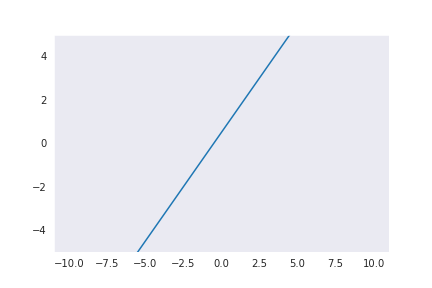

In [18]:
# Activate the widget based backend.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib ipympl

x = np.linspace(-10, 10, num=1000)
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim(-5, 5)
# Initialize a plot object with y = x. We'll be modifying y below.
# This returns a list of `.Line2D` representing the plotted data. We grab the first one -- we only have 1 series.
line = ax.plot(x, x)[0]

@widgets.interact(m=(-2.0, 2.0), b=(-3, 3, 0.5))
def update_line(m=1, b=0.5):
    line.set_ydata(m * x + b)
    # Request a widget redraw.
    fig.canvas.draw_idle()
    

#### Exercise 1

Write a cell that plots either $sin(kx-p)$ or $cos(kx-p)$ and make it interactive using interact, so that there are sliders for the parameters $0.5<k<2$ and , $0<p<2\pi$ and a checkbox to switch between $cos$ and $sin$

In [7]:
# write code for Exercise 1 here

## Other useful libraries
#### tqdm
```tqdm``` provides a very simple loading bar that is useful when running code that takes a long time

In [8]:
from tqdm import tqdm

Simply wrap your loop in the tqdm function and it will automatically create a loading bar for you

In [18]:
from time import sleep

for i in tqdm(range(1000)):
    sleep(0.005)

100%|██████████| 1000/1000 [00:05<00:00, 189.69it/s]


#### Seaborn
Seaborn is a plotting library that has great and easy visualization tools for scientists. In addition to it's own set of plotting functions, importing seaborn can greatly improve the quality of simple matlab plots

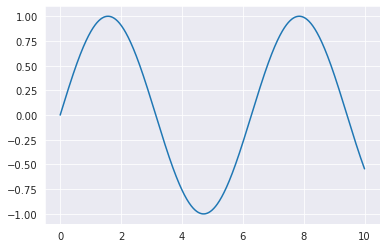

In [12]:
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

xs = np.linspace(0,10,1000)
fig, ax = plt.subplots()
ax.plot(xs, np.sin(xs))


#### Exercise 1

Explore the documentation for seaborn and try plotting some unique plots, feel free to do this either in this jupyter notebook or in the google colab from earlier today using the data from earlier sections